In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
!pip install xgboost
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
df=pd.read_csv('/content/Wine.csv')

In [3]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


<Axes: >

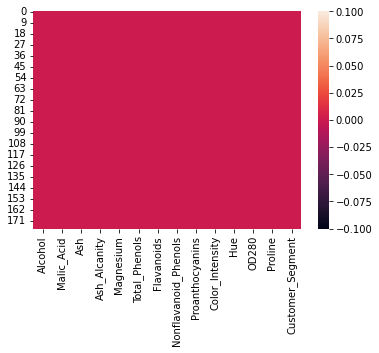

In [4]:
sns.heatmap(df.isna())

In [5]:
x=df.iloc[:,:-1]
y=df['Customer_Segment']

In [6]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [7]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred=lg.predict(xtest)
print(classification_report(ytest,ypred))
print('Train Accuracy:',lg.score(xtrain,ytrain))
print('Test Accuracy:',lg.score(xtest,ytest))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.87      1.00      0.93        13
           3       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36

Train Accuracy: 0.971830985915493
Test Accuracy: 0.9444444444444444


In [8]:
bg=BaggingClassifier(DecisionTreeClassifier())

In [9]:
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))
print('Train Accuracy:',bg.score(xtrain,ytrain))
print('Test Accuracy:',bg.score(xtest,ytest))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

Train Accuracy: 1.0
Test Accuracy: 0.9722222222222222


In [10]:
def predictor(model): 
   model.fit(xtrain,ytrain)
   ypred=bg.predict(xtest)
   print(classification_report(ytest,ypred))
   print('Train Accuracy:',model.score(xtrain,ytrain))
   print('Test Accuracy:',model.score(xtest,ytest))

In [11]:
predictor(DecisionTreeClassifier())

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

Train Accuracy: 1.0
Test Accuracy: 0.9444444444444444


In [12]:
predictor(BaggingClassifier(DecisionTreeClassifier()))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

Train Accuracy: 1.0
Test Accuracy: 0.9722222222222222


In [13]:
predictor(LogisticRegression())

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

Train Accuracy: 0.971830985915493
Test Accuracy: 0.9444444444444444


In [14]:
predictor(KNeighborsClassifier())

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

Train Accuracy: 0.823943661971831
Test Accuracy: 0.6388888888888888


In [15]:
predictor(BaggingClassifier(KNeighborsClassifier()))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

Train Accuracy: 0.8380281690140845
Test Accuracy: 0.6388888888888888


BOosting Classifier

In [16]:
predictor(AdaBoostClassifier())

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

Train Accuracy: 0.9225352112676056
Test Accuracy: 0.8333333333333334


In [17]:
predictor (GradientBoostingClassifier())

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

Train Accuracy: 1.0
Test Accuracy: 0.9444444444444444


KFold Cross Validation


In [18]:
kf=KFold(n_splits=10)
score=cross_val_score(GradientBoostingClassifier(),x,y,cv=kf)
score

array([0.94444444, 0.88888889, 0.94444444, 0.88888889, 0.83333333,
       1.        , 0.94444444, 0.83333333, 0.88235294, 1.        ])

In [19]:
score.mean()

0.9160130718954248

In [20]:
predictor(XGBClassifier())

ValueError: ignored

<Axes: ylabel='count'>

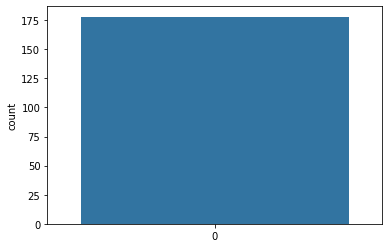

In [24]:
sns.countplot(df['Customer_Segment'])

In [25]:
le=LabelEncoder()
y=le.fit_transform(y)

In [26]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [28]:
df['Customer_Segment']=y
x=df.iloc[:,:-1]
y=df['Customer_Segment']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=8)

In [29]:
predictor(XGBClassifier())

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      11.0
           1       0.00      0.00      0.00      14.0
           2       0.00      0.00      0.00      11.0
           3       0.00      0.00      0.00       0.0

    accuracy                           0.00      36.0
   macro avg       0.00      0.00      0.00      36.0
weighted avg       0.00      0.00      0.00      36.0

Train Accuracy: 1.0
Test Accuracy: 0.9722222222222222


In [37]:
models=[]
models.append(('lr',LogisticRegression()))
models.append(('dt',DecisionTreeClassifier()))
models.append(('dt1',DecisionTreeClassifier(criterion='entropy')))
models.append(('knn',KNeighborsClassifier()))
models.append(('rf',RandomForestClassifier()))

In [38]:
predictor(VotingClassifier(estimators=models))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      11.0
           1       0.00      0.00      0.00      14.0
           2       0.00      0.00      0.00      11.0
           3       0.00      0.00      0.00       0.0

    accuracy                           0.00      36.0
   macro avg       0.00      0.00      0.00      36.0
weighted avg       0.00      0.00      0.00      36.0

Train Accuracy: 1.0
Test Accuracy: 1.0


In [39]:
predictor(StackingClassifier(estimators=models,final_estimator=RandomForestClassifier()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      11.0
           1       0.00      0.00      0.00      14.0
           2       0.00      0.00      0.00      11.0
           3       0.00      0.00      0.00       0.0

    accuracy                           0.00      36.0
   macro avg       0.00      0.00      0.00      36.0
weighted avg       0.00      0.00      0.00      36.0

Train Accuracy: 1.0
Test Accuracy: 0.9444444444444444
